In [77]:
import pandas as pd

In [78]:
# Load Dataset

dataset = pd.read_csv("dataset.csv")

In [81]:
# drop nulls

dataset = dataset.dropna()

In [82]:
# Check load

print(dataset.shape)
print(dataset.columns)
dataset.head()


(113999, 21)
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [83]:
# Filter songs by popularity (dataset is too big)

dataset = dataset[dataset["popularity"] > 30]

In [84]:
# Feature Selection and Y target set

features = ['artists', 
             'album_name', 
             'track_name', 
             'duration_ms', 
             'danceability', 
             'energy', 
             'key', 
             'loudness', 
             'mode', 
             'speechiness', 
             'acousticness', 
             'instrumentalness', 
             'liveness', 
             'valence', 
             'tempo', 
             'time_signature', 
             'track_genre']

dataset = dataset[features]
dataset["y_target"] = -1

In [85]:
# Check feature selection

dataset.shape
dataset.head()

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,y_target
0,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,-1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,-1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,-1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,-1
4,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,-1


In [86]:
# User trains by choosing his favorite artist (or songs)

dataset.loc[dataset["track_name"] == "Like a Rolling Stone", "y_target"] = 1
dataset.loc[dataset["track_name"] == "É Proibido Fumar - Versão remasterizada", "y_target"] = 1
dataset.loc[dataset["track_name"] == "Angie", "y_target"] = 1
dataset.loc[dataset["track_name"] == "Martha My Dear - Remastered 2009", "y_target"] = 1
dataset.loc[dataset["track_name"] == "I Love It Loud", "y_target"] = 1
dataset.loc[dataset["track_name"] == "La Belle de Jour", "y_target"] = 1
dataset.loc[dataset["track_name"] == "O Descobridor dos Sete Mares", "y_target"] = 1
dataset.loc[dataset["track_name"] == "Jump - 2015 Remaster", "y_target"] = 1
dataset.loc[dataset["track_name"] == "Have You Ever Seen The Rain", "y_target"] = 1
dataset.loc[dataset["track_name"] == "White Room", "y_target"] = 1

# else is 0

dataset.loc[dataset["y_target"] == -1, "y_target"] = 0

In [87]:
from sklearn.preprocessing import StandardScaler

# Normalize features

features_to_normalize = [
             'duration_ms', 
             'danceability', 
             'energy', 
             'key', 
             'loudness', 
             'mode', 
             'speechiness', 
             'acousticness', 
             'instrumentalness', 
             'liveness', 
             'valence', 
             'tempo', 
             'time_signature']

scaler = StandardScaler()
dataset[features_to_normalize] = scaler.fit_transform(dataset[features_to_normalize])

In [88]:
# Check normalization

dataset.head()

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,y_target
0,Gen Hoshino,Comedy,Comedy,0.026587,0.619106,-0.743935,-1.21293,0.271316,-1.318213,0.848222,-0.883068,-0.445076,0.739286,0.971308,-1.158822,0.204636,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,-0.820659,-0.945020,-1.981884,-1.21293,-1.902479,0.758603,0.005348,1.942657,-0.445060,-0.582206,-0.792652,-1.508481,0.204636,acoustic,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,-0.180793,-0.835042,-1.171972,-1.49400,-0.347933,0.758603,-0.254970,-0.319697,-0.445080,-0.499934,-1.371451,-1.547276,0.204636,acoustic,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,-0.273748,-1.885939,-2.428385,-1.49400,-2.167753,0.758603,-0.500124,1.882455,-0.444830,-0.422804,-1.280891,1.987139,-2.206826,acoustic,0
4,Chord Overstreet,Hold On,Hold On,-0.305942,0.264734,-0.819471,-0.93186,-0.336949,0.758603,-0.294144,0.500961,-0.445080,-0.675276,-1.186393,-0.084763,0.204636,acoustic,0


In [89]:
# Generate new_dataset with same amount of examples True and False

true = dataset[dataset["y_target"] == 1]
false = dataset[dataset["y_target"] == 0].sample(true.shape[0])

new_dataset = pd.concat([true, false], axis=0)

In [90]:
new_dataset.shape

(44, 18)

In [91]:
# Encode categorical variables
columns = ['artists', 'album_name', 'track_name', 'track_genre']

dummies = pd.get_dummies(new_dataset, columns=columns, drop_first=False)
dataset = new_dataset[columns]
dataset = pd.concat([dataset, dummies], axis=1)

In [92]:
dataset.shape

(44, 148)

In [93]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = dataset.drop(columns=['y_target'])
y = dataset['y_target']

knn_classifier = KNeighborsClassifier(n_neighbors=11)

loo = LeaveOneOut()

predictions = []
backup_X_test = None

for train_index, test_index in loo.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train = X_train.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)

    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    backup_X_test = pd.concat([backup_X_test, X_test.copy()], axis=0)
    X_test = X_test.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    predictions.append(y_pred[0])

# Avalie o desempenho do modelo
accuracy = accuracy_score(y, predictions)
print("Acurácia do modelo com LOO:", accuracy)



Acurácia do modelo com LOO: 0.4772727272727273


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.47      0.32      0.38        22
           1       0.48      0.64      0.55        22

    accuracy                           0.48        44
   macro avg       0.47      0.48      0.46        44
weighted avg       0.47      0.48      0.46        44



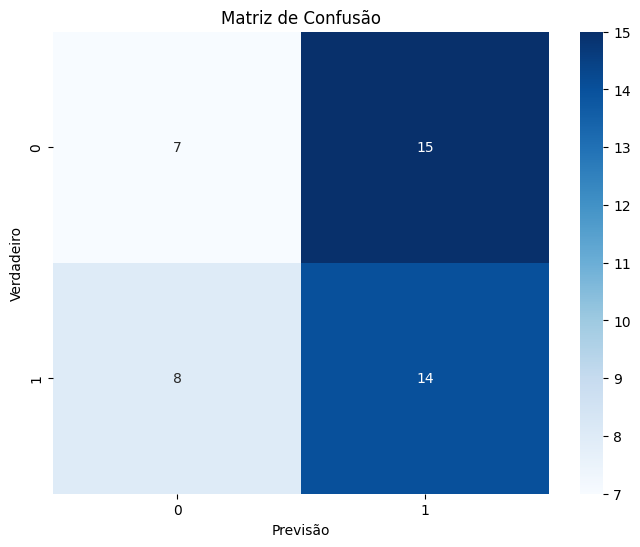

In [94]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Relatório de Classificação:")
print(classification_report(y, predictions))

cm = confusion_matrix(y, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [95]:
pred = pd.DataFrame(predictions, columns=["y_target"])
pred.reset_index(drop=True, inplace=True)

output = pd.DataFrame(backup_X_test)

output[0] = "artists"
output[1] = "track_name"
output[2] = "album_name"
output = output[["artists", "track_name", "album_name"]]

output.reset_index(drop=True, inplace=True)


output = pd.concat([output, pred], axis=1)

output.sort_values("y_target").to_csv("output-by-track.csv")